# Cubic spline

Example cubic spline.  Based on Numerical Recipes, Section 3.3.

In [2]:
import numpy as np

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
class CubicSpline():
    ''' cubic spline of a function
    
         - equally-spaced knots
         - derivatives specified at endpoints
    '''
    def __init__(self, fn, xmin, xmax, n, df_left, df_right):
        ''' set up the spline by solving the required linear equation
        '''
        # function values at knots
        self.x = np.linspace(xmin, xmax, n)
        self.y = np.array(list(map(fn, self.x)))
        self.h = self.x[1]-self.x[0]
        
        # solve for z's
        
        # tridiagonal matrix
        A = np.diag([2.] + [4.]*(n-2) + [2.]) \
            + np.diag([1.]*(n-1), 1) + np.diag([1.]*(n-1), -1)

        # rhs
        b = np.zeros(n)
        
        # interior knots
        b[1:(n-1)] = (6/self.h**2)*(self.y[:(n-2)]-2*self.y[1:(n-1)]+self.y[2:])
        
        # endpoints
        b[0] = (6/self.h**2)*(self.y[1]-self.y[0]) - (6/self.h)*df_left
        b[n-1] = -(6/self.h**2)*(self.y[n-1]-self.y[n-2]) + (6/self.h)*df_right
        
        # solve and store z-values
        self.z = np.linalg.solve(A, b)
        
    def __call__(self, x):
        ''' approximate the function at given location
        '''
        # linear search to find the interval x belongs to
        #    (simple but not the most efficient)
        if x<self.x[0] or x>self.x[-1]:
            raise ValueError("x out of range: {}".format(x))
        for n, _x in enumerate(self.x):
            if x<=_x:
                break
        
        # polynomial values
        a = (_x - x)/self.h
        b = 1-a
        c = (self.h**2/6)*a*(a**2 - 1)
        d = (self.h**2/6)*b*(b**2 - 1)
        
        # interpolation results
        return a*self.y[n-1] + b*self.y[n] + c*self.z[n-1] + d*self.z[n]

## Try it out

In [121]:
sin_spline = CubicSpline(np.sin, 0.0, 2.*np.pi, 11, 1, -1)

In [122]:
sin_spline(1.0)

0.84112806560155751

In [123]:
np.sin(1.0)

0.8414709848078965

## Try it out over a range

Ok, that looked promising...try plotting the error in approximating $\log(x)$

In [124]:
xmin = 1.0
xmax = np.exp(1.0)
n = 11

log_spline = CubicSpline(np.log, xmin, xmax, n, 1, np.exp(-1))

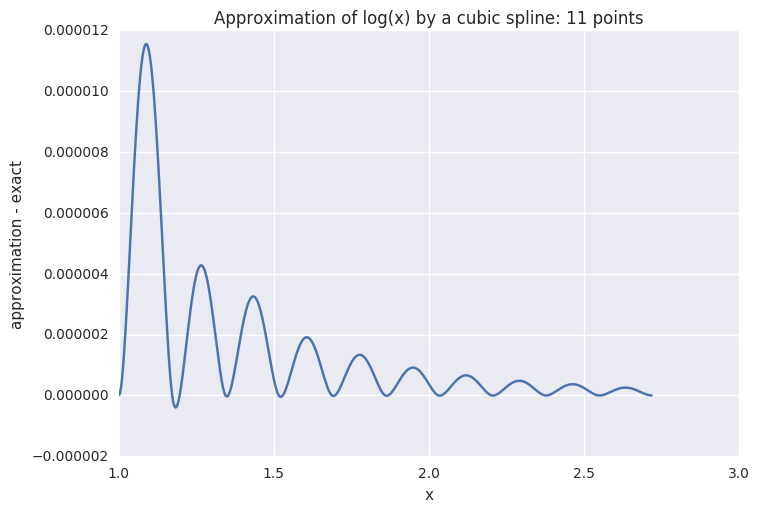

In [125]:
xtest = np.linspace(xmin, xmax, 500)
yexact = np.array(list(map(np.log, xtest)))
yapprox = np.array(list(map(log_spline, xtest)))

plt.plot(xtest, yapprox-yexact)
plt.title("Approximation of log(x) by a cubic spline: {} points".format(n))
plt.xlabel('x')
plt.ylabel("approximation - exact")

plt.show()

As expected, the error:
  1. is locally largest between knots, and is zero at the knots
  1. is globally largest where the third derivative of $log(x)$ is greatest, that is, at the left-hand endpoint